In [3]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext rpy2.ipython
%matplotlib inline

In [28]:
df = pd.read_csv("data_csv/daily_coffee_price.csv").drop(columns=["Unnamed: 0"])
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,composite_ind,columbian_milds,other_milds,brazilian_nat,robustas
0,2017-08-01,130.82,158.74,153.49,136.18,104.83
1,2017-08-02,133.23,162.06,156.95,139.18,105.86
2,2017-08-03,133.11,161.91,156.81,139.15,105.69
3,2017-08-04,133.05,161.81,156.85,138.97,105.67
4,2017-08-07,134.72,163.77,158.87,141.04,106.73


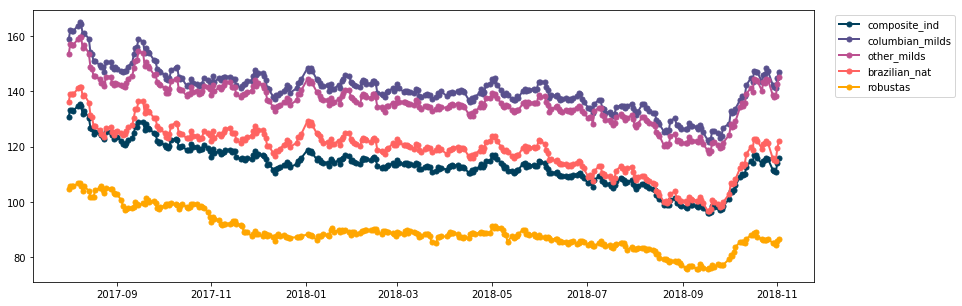

In [27]:
plt.figure(figsize=(14, 5))
plt.plot('date', 'composite_ind', data=df, marker='o', markerfacecolor='#003f5c', markersize=5, color='#003f5c', linewidth=2)
plt.plot('date', 'columbian_milds', data=df, marker='o', markerfacecolor='#58508d', markersize=5, color='#58508d', linewidth=2)
plt.plot('date', 'other_milds', data=df, marker='o', markerfacecolor='#bc5090', markersize=5, color='#bc5090', linewidth=2)
plt.plot('date', 'brazilian_nat', data=df, marker='o', markerfacecolor='#ff6361', markersize=5, color='#ff6361', linewidth=2)
plt.plot('date', 'robustas', data=df, marker='o', markerfacecolor='#ffa600', markersize=5, color='#ffa600', linewidth=2)
plt.legend(bbox_to_anchor=(1.02,1))

In [8]:
df.tail(5)

,date,composite_ind,columbian_milds,other_milds,brazilian_nat,robustas
370,2018-10-29,111.70,142.34,138.71,115.83,85.25
371,2018-10-30,111.23,141.68,138.06,115.26,85.00
372,2018-10-31,110.81,141.02,138.16,114.92,84.32
373,2018-11-01,114.21,144.70,142.74,119.50,86.06
374,2018-11-02,115.90,147.06,145.18,121.97,86.52


## Select rates for countries that produce coffee

In [9]:
countr = "Angola, Bolivia, Brazil, Burundi, Cameroon, Central African Republic, Congo, Colombia, Costa Rica, Côte d'Ivoire, Cuba, Dominican Republic, Ecuador, El Salvador, Ethiopia, Gabon, Ghana, Guatemala, Honduras, India, Indonesia, Jamaica, Kenya, Liberia, Madagascar, Malawi, Mexico, Nepal, Nicaragua, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Rwanda, Sierra Leone, Tanzania, Thailand, Timor-Leste, Togo, Uganda, Venezuela, Vietnam, Yemen, Zambia, Zimbabwe"


In [10]:
countr = countr.split(", ")

In [11]:
countr[:5]

['Angola', 'Bolivia', 'Brazil', 'Burundi', 'Cameroon']

In [12]:
import mpu

In [13]:
curr_prod = {}
for i in countr:
    try:
        curr_prod[i] = mpu.units.get_currency(i.upper()).code
    except ValueError:
        curr_prod[i] = []

In [14]:
curr_prod['Central African Republic'] = "CFA"
curr_prod['Congo'] = "CDF"
curr_prod['Dominican Republic'] = "DOP"
curr_prod['Philippines'] = "PHP"
curr_prod['Tanzania'] = "TZS"

In [15]:
curr = pd.read_csv("currency_rate_USD_base.csv").drop(columns=["Unnamed: 0"])

In [16]:
curr_prod["Colombia"]

'COP'

In [17]:
curr.head()

,date,USDAED,USDAFN,USDALL,USDAMD,USDANG,USDAOA,USDARS,USDAUD,USDAWG,...,USDXAU,USDXCD,USDXDR,USDXOF,USDXPF,USDYER,USDZAR,USDZMK,USDZMW,USDZWL
0,2017-08-01,3.672502,68.319735,112.330002,478.109985,1.770246,165.093994,17.556999,1.256801,1.78,...,0.000789,2.704398,0.708254,569.750323,101.029957,249.899994,13.247395,8.945037,8.929900,322.355011
1,2017-08-02,3.672199,68.360001,111.000088,478.079987,1.770024,165.093994,17.559021,1.257026,1.78,...,0.000792,2.707442,0.707920,549.999918,100.579795,249.929993,13.212700,9.005029,9.020227,322.355011
2,2017-08-03,3.672502,68.309998,110.949997,478.220001,1.770075,165.093994,17.643017,1.256498,1.78,...,0.000788,2.715111,0.708005,566.999970,100.450095,249.949997,13.379903,9.069589,9.079460,322.355011
3,2017-08-04,3.672304,68.320404,112.099998,478.269989,1.770403,165.093994,17.643041,1.260504,1.78,...,0.000794,2.703604,0.707254,572.580017,101.675037,249.949997,13.449804,9.055037,9.080363,322.355011
4,2017-08-05,3.672304,68.320404,112.099998,478.269989,1.770403,165.093994,17.643041,1.260504,1.78,...,0.000794,2.703606,0.707254,572.580017,101.675037,249.949997,13.449804,9.055037,9.080363,322.355011


In [18]:
curr.columns = [name.replace("USD", "") for name in curr.columns]

In [19]:
coffee_prod_cols = [i for i in curr.columns if i in curr_prod.values()]
coffee_prod_cols.append("date")
coffee_prod = curr[coffee_prod_cols]

In [20]:
coffee_prod

,AOA,BIF,BRL,CDF,COP,CRC,CUP,DOP,ETB,GHS,...,SVC,THB,TZS,UGX,XAF,XOF,YER,ZMW,ZWL,date
0,165.093994,1722.560059,3.125799,1642.749511,2966.399902,567.940002,26.50000,47.029999,23.120001,4.398502,...,8.749913,33.259998,2231.999808,3594.999942,554.950012,569.750323,249.899994,8.929900,322.355011,2017-08-01
1,165.093994,1723.010010,3.113600,1560.949951,2961.300049,568.960022,26.50000,47.029999,23.149953,4.398500,...,8.750340,33.270407,2231.999956,3601.999643,553.030029,549.999918,249.929993,9.020227,322.355011,2017-08-02
2,165.093994,1723.239990,3.112701,1555.229980,2953.300049,569.340027,26.50000,47.040001,23.091881,4.398502,...,8.749978,33.229876,2231.999887,3611.999979,551.440002,566.999970,249.949997,9.079460,322.355011,2017-08-03
3,165.093994,1723.729980,3.130504,1555.479980,2985.000000,570.539978,26.50000,47.020393,23.103874,4.379704,...,8.750370,33.259998,2231.000335,3607.000335,556.580017,572.580017,249.949997,9.080363,322.355011,2017-08-04
4,165.093994,1723.729980,3.130504,1555.479980,2985.000000,570.539978,26.50000,47.020393,23.103876,4.379704,...,8.750370,33.259998,2231.000336,3607.000335,556.580017,572.580017,249.949997,9.080363,322.355011,2017-08-05
5,165.093994,1723.729980,3.130503,1555.479981,2983.000000,570.539978,26.50000,47.020219,23.100915,4.398497,...,8.750226,33.240002,2231.999779,3607.000236,556.289978,549.999850,249.949997,9.080099,322.355011,2017-08-06
6,165.093994,1724.020020,3.125500,1595.800049,2978.100098,570.479980,26.50000,47.369999,23.149754,4.398498,...,8.750086,33.269864,2230.999932,3603.999792,555.419983,551.419983,249.899994,9.059832,322.355011,2017-08-07
7,165.093994,1724.300049,3.127399,1595.800049,2995.500000,569.419983,26.50000,47.019936,23.139999,4.398498,...,8.749878,33.270172,2230.999748,3602.000322,557.489990,556.520020,249.949997,8.879865,322.355011,2017-08-08
8,165.093994,1724.849976,3.155403,1595.800049,3000.000000,570.429993,26.50000,47.019940,23.226498,4.398500,...,8.749909,33.220001,2231.000325,3601.000179,557.330017,555.960022,249.949997,8.880254,322.355011,2017-08-09
9,165.093994,1725.050049,3.174896,1595.800049,2997.500000,572.260010,26.50000,47.019958,23.230903,4.398502,...,8.749530,33.240002,2231.000419,3596.999760,556.969971,557.789978,249.949997,8.880249,322.355011,2017-08-10


In [21]:
df = pd.read_csv("full_data.csv").drop(columns=["Unnamed: 0"])

In [22]:
type(coffee_prod.date.iloc[0])

str

In [23]:
data = pd.merge(df, coffee_prod, on="date", how="left")

In [2]:
import pandas as pd
pd.read_csv("merged_data.csv")

,Unnamed: 0,date,composite_ind,columbian_milds,other_milds,brazilian_nat,robustas,AOA,BIF,BRL,...,SLL,SVC,THB,TZS,UGX,XAF,XOF,YER,ZMW,ZWL
0,0,2017-08-01,130.82,158.74,153.49,136.18,104.83,165.093994,1722.560059,3.125799,...,7500.000287,8.749913,33.259998,2231.999808,3594.999942,554.950012,569.750323,249.899994,8.929900,322.355011
1,1,2017-08-02,133.23,162.06,156.95,139.18,105.86,165.093994,1723.010010,3.113600,...,7500.000100,8.750340,33.270407,2231.999956,3601.999643,553.030029,549.999918,249.929993,9.020227,322.355011
2,2,2017-08-03,133.11,161.91,156.81,139.15,105.69,165.093994,1723.239990,3.112701,...,7499.999722,8.749978,33.229876,2231.999887,3611.999979,551.440002,566.999970,249.949997,9.079460,322.355011
3,3,2017-08-04,133.05,161.81,156.85,138.97,105.67,165.093994,1723.729980,3.130504,...,7500.000338,8.750370,33.259998,2231.000335,3607.000335,556.580017,572.580017,249.949997,9.080363,322.355011
4,4,2017-08-07,134.72,163.77,158.87,141.04,106.73,165.093994,1724.020020,3.125500,...,7499.999591,8.750086,33.269864,2230.999932,3603.999792,555.419983,551.419983,249.899994,9.059832,322.355011
5,5,2017-08-08,135.23,164.91,159.52,141.52,107.02,165.093994,1724.300049,3.127399,...,7500.000469,8.749878,33.270172,2230.999748,3602.000322,557.489990,556.520020,249.949997,8.879865,322.355011
6,6,2017-08-09,134.65,164.32,159.56,141.49,105.59,165.093994,1724.849976,3.155403,...,7499.999920,8.749909,33.220001,2231.000325,3601.000179,557.330017,555.960022,249.949997,8.880254,322.355011
7,7,2017-08-10,131.77,160.68,155.66,138.16,103.94,165.093994,1725.050049,3.174896,...,7499.999948,8.749530,33.240002,2231.000419,3596.999760,556.969971,557.789978,249.949997,8.880249,322.355011
8,8,2017-08-11,132.88,161.12,156.74,138.79,105.64,165.093994,1725.369995,3.192204,...,7500.000339,8.750370,33.180370,2232.000336,3595.000335,554.119995,557.789978,249.899994,8.990363,322.355011
9,9,2017-08-14,130.49,158.94,153.57,135.93,104.04,165.093994,1725.729980,3.188205,...,7499.999910,8.749825,33.240002,2231.000323,3591.999813,556.590027,557.229980,249.899994,9.000115,322.355011


In [25]:
data.to_csv("merged_data.csv")

In [26]:
columb_milds_y = coffee_prod_cols[:-1]+ ["columbian_milds"]
other_milds_y = coffee_prod_cols[:-1]+ ["other_milds"]
brazillian_nat_y = coffee_prod_cols[:-1]+ ["brazilian_nat"]
robustas_y = coffee_prod_cols[:-1]+ ["robustas"]

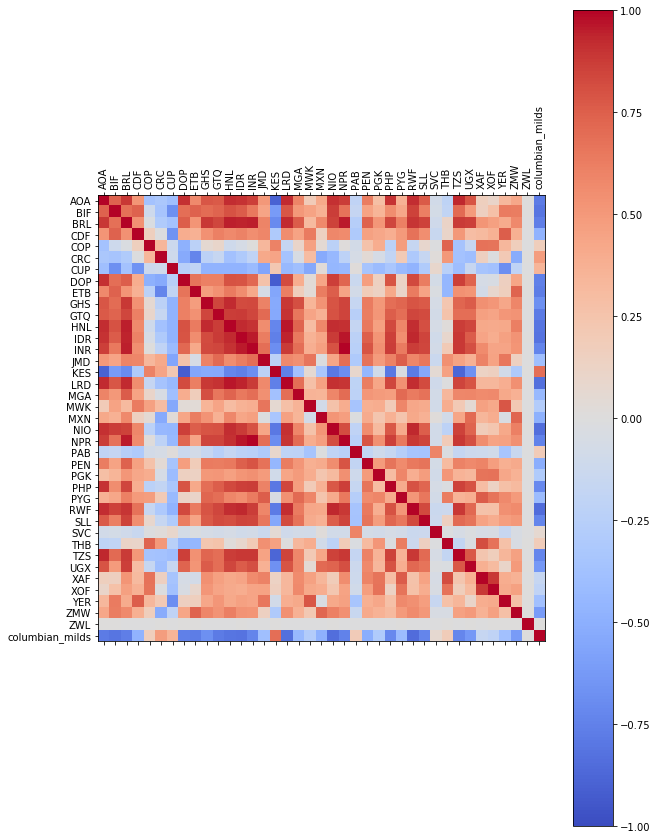

In [33]:
corr = data[columb_milds_y].corr()
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data[columb_milds_y].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data[columb_milds_y].columns)
ax.set_yticklabels(data[columb_milds_y].columns)
plt.show()

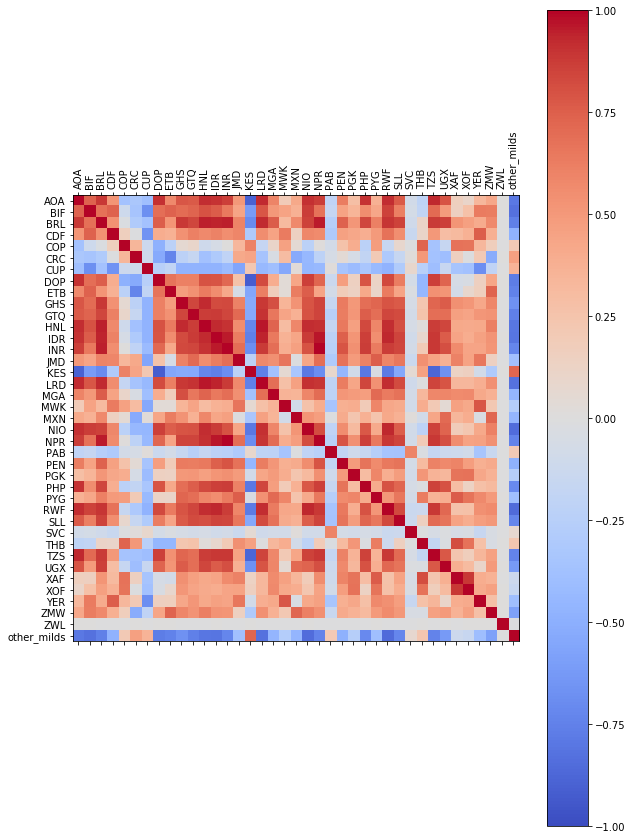

In [34]:
corr = data[other_milds_y].corr()
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data[other_milds_y].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data[other_milds_y].columns)
ax.set_yticklabels(data[other_milds_y].columns)
plt.show()

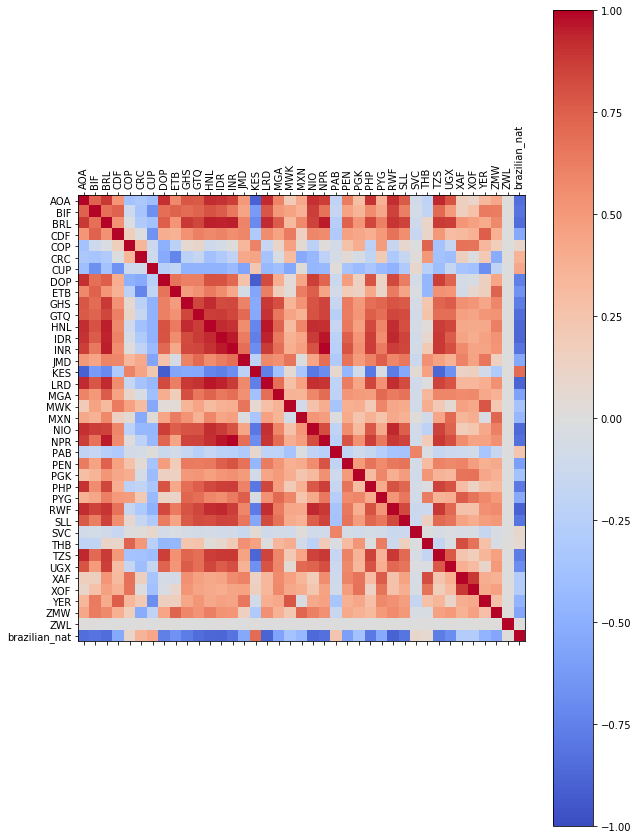

In [35]:
corr = data[brazillian_nat_y].corr()
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data[brazillian_nat_y].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data[brazillian_nat_y].columns)
ax.set_yticklabels(data[brazillian_nat_y].columns)
plt.show()

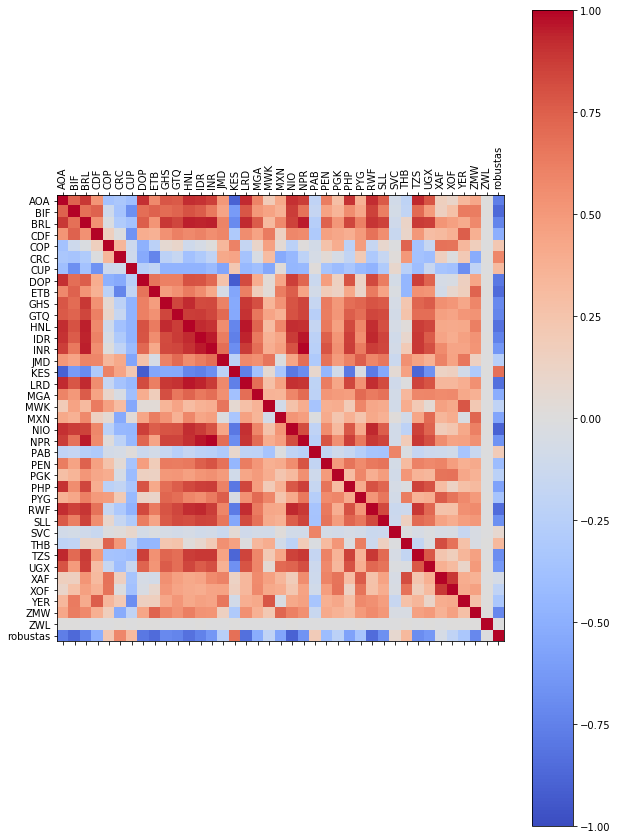

In [36]:
corr = data[robustas_y].corr()
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data[robustas_y].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data[robustas_y].columns)
ax.set_yticklabels(data[robustas_y].columns)
plt.show()

In [45]:
cons_currencies = ["EUR", "JPY", "RUB", "CAD", "KRW", "AUD", "UAH", "SAR", "CHF"]
cons_currencies.append("date")
coffee_cons = curr[cons_currencies]

In [46]:
consumption_data = pd.merge(df, coffee_cons, on="date", how="left")

In [47]:
consumption_data

,date,composite_ind,columbian_milds,other_milds,brazilian_nat,robustas,EUR,JPY,RUB,CAD,KRW,AUD,UAH,SAR,CHF
0,2017-08-01,130.82,158.74,153.49,136.18,104.83,0.846304,110.434998,60.271999,1.254697,1119.869995,1.256801,25.820266,3.749400,0.965410
1,2017-08-02,133.23,162.06,156.95,139.18,105.86,0.843600,110.759003,60.491699,1.257330,1121.589966,1.257026,25.919876,3.749396,0.970580
2,2017-08-03,133.11,161.91,156.81,139.15,105.69,0.841298,109.897003,60.334599,1.256800,1126.749554,1.256498,25.860001,3.749401,0.967870
3,2017-08-04,133.05,161.81,156.85,138.97,105.67,0.849040,110.639999,59.910999,1.264404,1127.270020,1.260504,25.850367,3.749704,0.972640
4,2017-08-07,134.72,163.77,158.87,141.04,106.73,0.847200,110.760002,59.993999,1.267580,1124.849976,1.263102,25.739746,3.749799,0.973503
5,2017-08-08,135.23,164.91,159.52,141.52,107.02,0.850499,110.107002,59.876999,1.267140,1125.359985,1.266398,25.690001,3.749699,0.973150
6,2017-08-09,134.65,164.32,159.56,141.49,105.59,0.849903,110.036003,60.019795,1.269520,1137.650024,1.266992,25.695037,3.749701,0.963500
7,2017-08-10,131.77,160.68,155.66,138.16,103.94,0.849403,109.094002,60.095001,1.273920,1143.150024,1.270698,25.660212,3.749695,0.961820
8,2017-08-11,132.88,161.12,156.74,138.79,105.64,0.845304,109.050003,59.814999,1.267204,1141.359985,1.264904,25.650367,3.749904,0.961204
9,2017-08-14,130.49,158.94,153.57,135.93,104.04,0.848897,109.939003,59.923901,1.272801,1138.329956,1.273000,25.604985,3.749697,0.972497


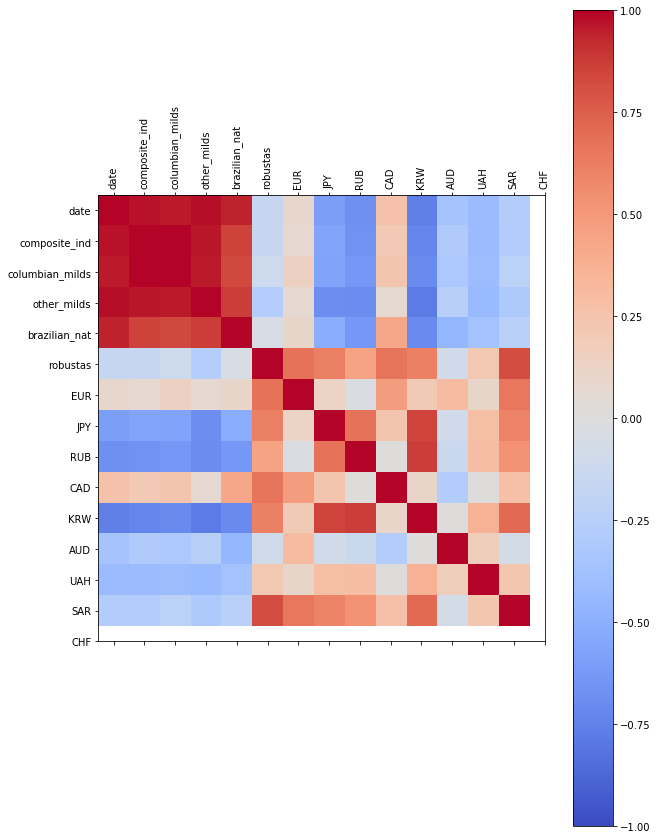

In [48]:
corr = consumption_data.corr()
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(consumption_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(consumption_data.columns)
ax.set_yticklabels(consumption_data.columns)
plt.show()